# <center>190020039 Homework 2 - PRML</center>
## Importing the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Data Generation
### Function to generate random points of an ellipse

In [2]:
def ellipse(n,a,b,alpha,h,k):
# n = no of points, a = semi major/minor axis length along x axis, b = semi major/minor axis length along y axis
# alpha = anticlockwise angle rotation from x axis
# h = x-component of center of ellipse, k = y-component of center of ellipse
    x=np.zeros(n);
    y=np.zeros(n);
    # loop to get n points
    while n > 0:
        # random points around h,k
        x_temp=np.random.uniform(h-a-b,h+a+b,1);
        y_temp=np.random.uniform(k-b-a,k+b+a,1);
        #check if point is inside ellipse
        #if not generate randomly again
        while ((((x_temp-h)*np.cos(alpha)+(y_temp-k)*np.sin(alpha))/a)**2+
                (((-(y_temp-k)*np.cos(alpha)+(x_temp-h)*np.sin(alpha))/b)**2)>1):
            x_temp=np.random.uniform(h-a-b,h+a+b,1);
            y_temp=np.random.uniform(k-b-a,k+b+a,1);
        # store if point is inside ellipse
        x[n-1]=x_temp;
        y[n-1]=y_temp;
        n-=1;
    return x,y

## PCA

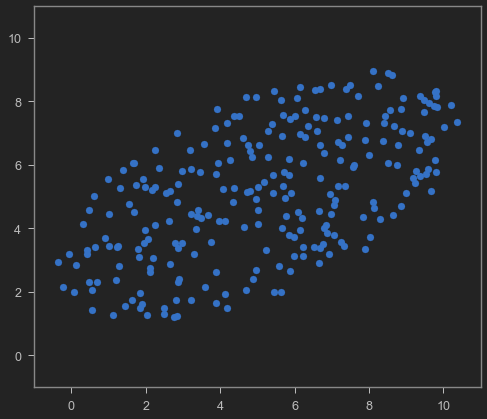

In [3]:
# generating an 250 point ellpise centered at (5,5) with major/minor axis as (3,6) and skew_angle of 30 deg
X,Y=ellipse(250,6,3,3.14/180*30,5,5)
#plotting the ellpise
plt.scatter(X, Y)
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.show()

In [4]:
# calculating PCA components
m_X=np.mean(X)
m_Y=np.mean(Y)
M=np.array([X-m_X,Y-m_Y])
C=M@M.T # covariance matrix
# Covariance Matrx Eigen value Decomposition
eig_val,eig_vec=np.linalg.eig(C) #eigenvalues and eigenvectors
print(eig_val)
print(eig_vec)

[2397.86174659  546.48119299]
[[ 0.86666174 -0.49889621]
 [ 0.49889621  0.86666174]]


## Plotting ellipse with components

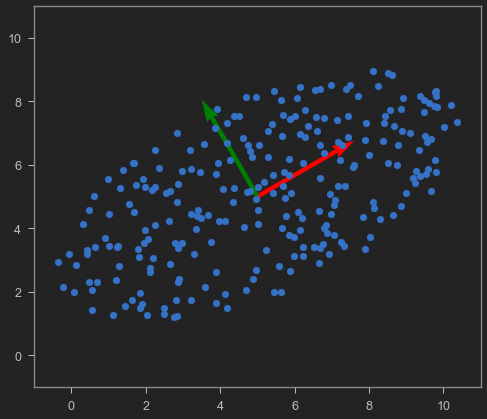

In [5]:
#plotting the 2 eigen vectors
plt.quiver([5,5],[5,5],eig_vec[0,:],eig_vec[1,:],scale=4,color=['red','green'],width=0.01)
#plotting ellipse
plt.scatter(X, Y)
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.show()

## LDA

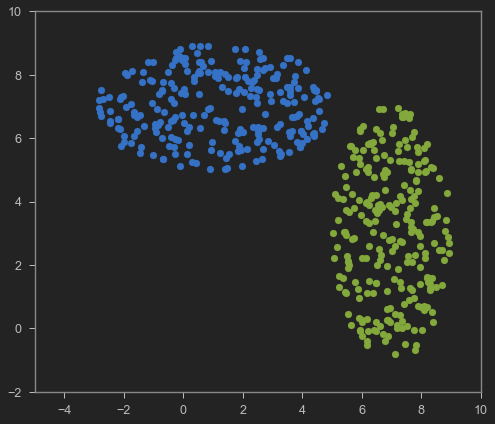

In [6]:
# generating 2 250 point ellpises
X1,Y1=ellipse(250,4,2,3.14/180*0,1,7)
X2,Y2=ellipse(250,2,4,3.14/180*0,7,3)
#plotting the ellpises
plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.xlim(-5, 10)
plt.ylim(-2, 10)
plt.show()

In [7]:
# array containing coordinates of all points
P1=np.array([X1,Y1])
P2=np.array([X2,Y2])
# print(P1.shape)
# mean of points on x and y axes
P1_mean=np.mean(P1,axis=1,keepdims=True)
P2_mean=np.mean(P2,axis=1,keepdims=True)
# print(P1_mean.shape)
# scatter for the 2 datasets
S1=(P1-P1_mean)@(P1-P1_mean).T
S2=(P2-P2_mean)@(P2-P2_mean).T
#within the class scatter matrix
Sw=S1+S2
# print(Sw.shape)
#class scatter matrix
Sb=(P1_mean-P2_mean)@(P1_mean-P2_mean).T
# covariance matrix
C=np.linalg.inv(Sw)@Sb
# Covariance Matrx Eigen value Decomposition
eig_val,eig_vec=np.linalg.eig(C) #eigenvalues and eigenvectors

## Plotting ellipse with components

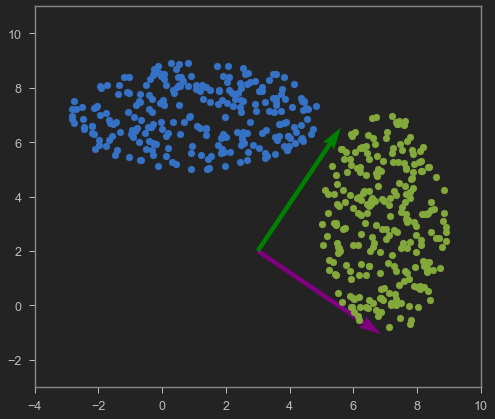

In [8]:
#plotting the 2 eigen vectors
plt.quiver([3,3],[2,2],eig_vec[0,:],eig_vec[1,:],scale=3,color=['purple','green'],width=0.01)
#plotting the ellpises
plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.xlim(-4, 10)
plt.ylim(-3, 11)
plt.show()